# Graph Generation

In [40]:
import os
import pandas as pd
import numpy as np

# 3D plotting utilities
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import proj3d

## Modelling Configuration

In [8]:
# Model input signals, excite the response
signal_types = ["ramp", "step", "sine", "trueHeading"]

## Raw

Let's consider how the raw signals look like:

In [58]:
# Raw data that has been modelled
full_model_data_raw = pd.DataFrame([])
# Iterate for each column in the data, ie. all sensor model signals
for i in signal_types:
    for j in os.listdir('cutoffVariations'):
        if j.startswith(i) and j.endswith("Raw.csv"):
            # Select iteration cutoff frequency from file name (for clearly formatted filenames)
            iteration_cutoff_frequency_raw = j.replace(i, "").replace("Raw.csv", "").replace("_", ".")
            # Check if the string is more than two characters long
            if len(iteration_cutoff_frequency_raw) > 2:
                # Select inital two integers
                initial_integers = iteration_cutoff_frequency_raw[0] + iteration_cutoff_frequency_raw[1]
            # Check if unclean cutoffFrequency string starts with 0
            if ((iteration_cutoff_frequency_raw.startswith("0")) & (iteration_cutoff_frequency_raw.find(".") == -1)):
                iteration_cutoff_frequency = "0." + iteration_cutoff_frequency_raw[1:]
                pass
            # Add decimal point on number within the order of 10^2
            elif ((len(iteration_cutoff_frequency_raw) >= 3) & \
                  (iteration_cutoff_frequency_raw.find(".") == -1) & \
                  (not iteration_cutoff_frequency_raw.startswith("0"))
                 ):
                if (int(initial_integers) < 20):
                    iteration_cutoff_frequency = iteration_cutoff_frequency_raw[0:2] + "." + iteration_cutoff_frequency_raw[1:]
                else:
                    iteration_cutoff_frequency = iteration_cutoff_frequency_raw[0:1] + "." + iteration_cutoff_frequency_raw[1:]
            
            iteration_read_data_raw = pd.read_csv("./cutoffVariations/" + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data_raw.loc[:, 'cutoffFrequency'] = np.array([float(iteration_cutoff_frequency)] * len(iteration_read_data_raw))
            iteration_read_data_raw.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data_raw))
            # Append into model
            full_model_data_raw = full_model_data_raw.append(iteration_read_data_raw, ignore_index=True)
full_model_data_raw

,time,compassSystem,compassFilter,fullSystem,gyroFilter,gyroSystem,input,error,cutoffFrequency,signalType
0,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.051495,step
1,0.000201,1.261886e-07,4.352662e-13,1.000017,1.000017,1.000027,1.000000,0.000017,0.051495,step
2,0.001206,4.542281e-06,9.400837e-11,1.000102,1.000102,1.000165,1.000000,0.000102,0.051495,step
3,0.006229,1.211837e-04,1.295934e-08,1.000529,1.000529,1.000850,1.000000,0.000529,0.051495,step
4,0.031348,3.058762e-03,1.647005e-06,1.002664,1.002662,1.004279,1.000000,0.002664,0.051495,step
5,0.100000,3.074538e-02,5.296265e-05,1.008531,1.008478,1.013650,1.000000,0.008531,0.051495,step
6,0.200000,1.197531e-01,4.157728e-04,1.011961,1.011546,1.021918,1.000000,0.011961,0.051495,step
7,0.300000,2.596702e-01,1.368554e-03,1.010462,1.009094,1.024669,1.000000,0.010462,0.051495,step
8,0.400000,4.402716e-01,3.144562e-03,1.012557,1.009413,1.030185,1.000000,0.012557,0.051495,step
9,0.500000,6.491798e-01,5.917472e-03,1.005193,0.999276,1.025220,1.000000,0.005193,0.051495,step


In [59]:
true_heading_model_data_raw = full_model_data_raw[full_model_data_raw.signalType == "trueHeading"]
true_heading_model_data_raw

,time,compassSystem,compassFilter,fullSystem,gyroFilter,gyroSystem,input,error,cutoffFrequency,signalType
1216,0.000000,0.000000e+00,0.000000e+00,1.032823,1.032823,1.032823,1.032823,0.000000,0.0010,trueHeading
1217,0.000020,4.182930e-10,1.781558e-18,0.005637,0.005637,0.005637,0.005635,0.000003,0.0010,trueHeading
1218,0.000039,2.363615e-09,2.836944e-17,2.314524,2.314524,2.314524,2.314518,0.000005,0.0010,trueHeading
1219,0.000047,3.724130e-09,5.162738e-17,1.179475,1.179475,1.179475,1.179469,0.000006,0.0010,trueHeading
1220,0.000055,5.503082e-09,8.681392e-17,0.849974,0.849974,0.849974,0.849966,0.000007,0.0010,trueHeading
1221,0.000061,7.389110e-09,1.281629e-16,1.332472,1.332472,1.332472,1.332464,0.000008,0.0010,trueHeading
1222,0.000067,9.250941e-09,1.777982e-16,1.779067,1.779067,1.779067,1.779058,0.000009,0.0010,trueHeading
1223,0.000073,1.107221e-08,2.347943e-16,1.738118,1.738118,1.738118,1.738109,0.000010,0.0010,trueHeading
1224,0.000078,1.276710e-08,2.956682e-16,2.940470,2.940470,2.940470,2.940459,0.000011,0.0010,trueHeading
1225,0.000083,1.472813e-08,3.654008e-16,2.431132,2.431132,2.431132,2.431120,0.000011,0.0010,trueHeading


In [60]:
# Create multiIndex for all repeated cutoffFrequencies and input signalType
true_heading_model_raw_multiIndex = pd.MultiIndex.from_frame(true_heading_model_data_raw.loc[:, ["cutoffFrequency","signalType"]])
# Remove index columns from DataFrame
true_heading_model_data = true_heading_model_data_raw.loc[:, (true_heading_model_data_raw.columns != "cutoffFrequency") \
                                                       & (true_heading_model_data_raw.columns != "signalType")].set_index(true_heading_model_raw_multiIndex)
true_heading_model_data

time  compassSystem  compassFilter  \
cutoffFrequency signalType                                             
0.0010          trueHeading   0.000000   0.000000e+00   0.000000e+00   
                trueHeading   0.000020   4.182930e-10   1.781558e-18   
                trueHeading   0.000039   2.363615e-09   2.836944e-17   
                trueHeading   0.000047   3.724130e-09   5.162738e-17   
                trueHeading   0.000055   5.503082e-09   8.681392e-17   
                trueHeading   0.000061   7.389110e-09   1.281629e-16   
                trueHeading   0.000067   9.250941e-09   1.777982e-16   
                trueHeading   0.000073   1.107221e-08   2.347943e-16   
                trueHeading   0.000078   1.276710e-08   2.956682e-16   
                trueHeading   0.000083   1.472813e-08   3.654008e-16   
                trueHeading   0.000087   1.651464e-08   4.301077e-16   
                trueHeading   0.000092   1.877269e-08   5.259138e-16   
                trueHeading   0.000098   2.129689e-08   6.393475e-16   
                trueHeading   0.000105   2.446673e-08   8.052525e-16   
                trueHeading   0.000111   2.705581e-08   9.505267e-16   
                trueHeading   0.000117   2.992214e-08   1.111187e-15   
                trueHeading   0.000122   3.307989e-08   1.288609e-15   
                trueHeading   0.000128   3.668805e-08   1.501662e-15   
                trueHeading   0.000134   4.027555e-08   1.733126e-15   
                trueHeading   0.000141   4.449027e-08   2.009835e-15   
                trueHeading   0.000147   4.890983e-08   2.315097e-15   
                trueHeading   0.000153   5.267862e-08   2.605871e-15   
                trueHeading   0.000159   5.644031e-08   2.906124e-15   
                trueHeading   0.000164   6.028963e-08   3.209756e-15   
                trueHeading   0.000175   6.938883e-08   3.937124e-15   
                trueHeading   0.000185   7.853361e-08   4.668259e-15   
                trueHeading   0.000194   8.785019e-08   5.459717e-15   
                trueHeading   0.000204   9.825739e-08   6.355622e-15   
                trueHeading   0.000219   1.156610e-07   7.914605e-15   
                trueHeading   0.000233   1.347582e-07   9.653683e-15   
...                                ...            ...            ...   
9.9206          trueHeading  69.000000  -5.097289e+01  -5.064382e+01   
                trueHeading  69.041489  -5.108224e+01  -5.077511e+01   
                trueHeading  69.080412  -5.116890e+01  -5.088863e+01   
                trueHeading  69.100000  -5.120553e+01  -5.094149e+01   
                trueHeading  69.124283  -5.124978e+01  -5.100295e+01   
                trueHeading  69.177037  -5.133828e+01  -5.112350e+01   
                trueHeading  69.200000  -5.137166e+01  -5.117082e+01   
                trueHeading  69.240184  -5.141889e+01  -5.124579e+01   
                trueHeading  69.285717  -5.145229e+01  -5.131532e+01   
                trueHeading  69.300000  -5.146136e+01  -5.133403e+01   
                trueHeading  69.315780  -5.147046e+01  -5.135320e+01   
                trueHeading  69.344459  -5.147984e+01  -5.138370e+01   
                trueHeading  69.372187  -5.147741e+01  -5.140662e+01   
                trueHeading  69.400000  -5.146467e+01  -5.142234e+01   
                trueHeading  69.440340  -5.142820e+01  -5.143056e+01   
                trueHeading  69.491912  -5.135983e+01  -5.141471e+01   
                trueHeading  69.500000  -5.134917e+01  -5.141007e+01   
                trueHeading  69.517007  -5.132378e+01  -5.139862e+01   
                trueHeading  69.535040  -5.129404e+01  -5.138396e+01   
                trueHeading  69.565062  -5.123330e+01  -5.135276e+01   
                trueHeading  69.600000  -5.115018e+01  -5.130516e+01   
                trueHeading  69.644368  -5.103324e+01  -5.122781e+01   
                trueHeading  69.700000  -5.087856e+01  -5.110959e+01   
  

In [272]:
true_heading_model_data.loc[pd.IndexSlice[9.9206, "trueHeading"], "time"]

cutoffFrequency  signalType 
9.9206           trueHeading     0.000000
                 trueHeading     0.000040
                 trueHeading     0.000065
                 trueHeading     0.000073
                 trueHeading     0.000080
                 trueHeading     0.000096
                 trueHeading     0.000103
                 trueHeading     0.000108
                 trueHeading     0.000113
                 trueHeading     0.000118
                 trueHeading     0.000125
                 trueHeading     0.000131
                 trueHeading     0.000135
                 trueHeading     0.000139
                 trueHeading     0.000146
                 trueHeading     0.000157
                 trueHeading     0.000166
                 trueHeading     0.000174
                 trueHeading     0.000182
                 trueHeading     0.000190
                 trueHeading     0.000200
                 trueHeading     0.000206
                 trueHeading     0.000213
     

In [194]:
# true_heading_model_data.loc[pd.IndexSlice[:, "trueHeading"], "fullSystem"].index
# true_heading_model_data.xs("cutoffFrequency")
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
Z

array([[ 0.70886129,  0.57562789,  0.42921793, ...,  0.27541086,
         0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       ...,
       [ 0.27541086,  0.09046523, -0.09334004, ..., -0.26940744,
        -0.09334004,  0.09046523],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ]])

In [274]:
surface_arrays_raw = np.array([])
for iteration_cutoff_frequency in true_heading_model_raw_multiIndex.levels[0]:
    # Access the raw time data for each cutoff Frequency
    iteration_raw_cutoff_data = true_heading_model_data.loc[pd.IndexSlice[iteration_cutoff_frequency, "trueHeading"], "fullSystem"]
    surface_arrays_raw = np.concatenate(surface_arrays_raw, iteration_raw_cutoff_data.values)
    print(surface_arrays_raw)
# surface_arrays = np.asarray(np.array_split(surface_arrays_raw, 3454))
# surface_arrays = surface_arrays_raw

TypeError: only integer scalar arrays can be converted to a scalar index

In [268]:
surface_arrays.ndim

1

In [271]:
surface_arrays[0]

array([ 1.03282317,  0.00563727,  2.31452368,  1.17947523,  0.84997383,
        1.33247196,  1.77906694,  1.73811838,  2.94046993,  2.43113156,
       -1.30895777,  1.14636642,  2.07165266,  0.48057862,  0.97534534,
        1.04937589,  1.49400821,  1.49041806,  0.42011922,  0.11651668,
       -0.43151742,  0.73500639,  1.24848153,  0.69258093, -1.08820585,
        2.81051103,  1.83473206,  0.48526173,  1.40483081,  1.51531794,
        1.39894816,  0.51833436,  1.35478346,  1.1410816 , -0.86211759,
        2.15135869,  0.67163979,  2.85655787, -0.37088525,  1.5874734 ,
        0.50017469,  0.11597386,  0.24774626,  0.86912375,  1.34352519,
       -0.13182799,  2.16300857, -0.10321098,  1.60564393,  1.01688289,
        0.49108441,  1.30734061,  2.32988212,  2.06685914,  2.01863019,
        1.31985278,  2.1698057 ,  0.54918087,  0.39657072,  1.24267857,
        0.95078109,  2.03944572,  0.43341652,  1.19337239,  0.89413632,
        2.01835397,  2.13293523, -0.65021204,  1.53938435,  0.92

In [ ]:
# Add into the figure
fig = plt.figure(0, figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

X = true_heading_model_data_raw.time
Y = true_heading_model_data_raw.cutoffFrequency
Z = true_heading_model_data_raw.fullSystem


# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title("Linear Material Phi-I Graphs", fontweight="bold", fontsize=16)
ax.set_xlabel("Airgap $mm$", fontsize =12)#, fontweight="bold")
ax.set_ylabel("Current $A$", fontsize =12)#, fontweight="bold")
ax.set_zlabel("Flux", fontsize =12)#, fontweight="bold")

ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

## Analytics

Note that if we want to model how the system error changes per 

In [ ]:
full_model_data_analytics_raw = pd.DataFrame([])
for i in signal_types:
    # List all the corresponding files
    for j in os.listdir('cutoffVariations'):
        if j.startswith(i) and j.endswith("Analytics.csv"):
            # Select iteration cutoff frequency from file name
            iteration_cutoff_frequency = j.replace(i, "").replace("Analytics.csv", "").replace("_", ".")
            iteration_read_data = pd.read_csv("./cutoffVariations/" + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data.loc[:, 'cutoffFrequency'] = np.array([float(iteration_cutoff_frequency)] * len(iteration_read_data))
            iteration_read_data.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data))
            # Append into model
            full_model_data_analytics_raw = full_model_data_analytics_raw.append(iteration_read_data, ignore_index=True)
full_model_data_analytics_raw

In [ ]:
# Create multiIndex for all model signals signalsNamesOrdered and input signalType
full_model_analytics_multiIndex = pd.MultiIndex.from_frame(full_model_data_analytics_raw.loc[:, ["signalsNamesOrdered","signalType"]])
# Remove index columns from DataFrame
full_model_analytics_data = full_model_data_analytics_raw.loc[:, (full_model_data_analytics_raw.columns != "signalsNamesOrdered") \
                                                       & (full_model_data_analytics_raw.columns != "signalType")].set_index(full_model_analytics_multiIndex)
full_model_analytics_data

In [17]:
model_signal_data = full_model_analytics_data.loc[pd.IndexSlice[model_signal, signal], :]
model_signal_data["cutoffFrequency"] = pd.to_numeric(model_signal_data.loc[:, "cutoffFrequency"])
model_signal_data.sort_values(by="cutoffFrequency")

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cutoffFrequency  firstMomentSignals  \
signalsNamesOrdered signalType                                         
input               trueHeading         0.021388                   0   
                    trueHeading         0.041776                   0   
                    trueHeading         0.062163                   0   
                    trueHeading         0.082551                   0   
                    trueHeading         0.100000                   0   
                    trueHeading         0.101200                   0   
                    trueHeading         0.102940                   0   
                    trueHeading         0.123330                   0   
                    trueHeading         0.143710                   0   
                    trueHeading         0.164100                   0   
                    trueHeading         0.184490                   0   
                    trueHeading         0.201400                   0   
                    trueHeading         0.204880                   0   
                    trueHeading         0.225270                   0   
                    trueHeading         0.245650                   0   
                    trueHeading         0.266040                   0   
                    trueHeading         0.286430                   0   
                    trueHeading         0.301600                   0   
                    trueHeading         0.306820                   0   
                    trueHeading         0.327200                   0   
                    trueHeading         0.347590                   0   
                    trueHeading         0.367980                   0   
                    trueHeading         0.388370                   0   
                    trueHeading         0.401790                   0   
                    trueHeading         0.408760                   0   
                    trueHeading         0.429140                   0   
                    trueHeading         0.449530                   0   
                    trueHeading         0.469920                   0   
                    trueHeading         0.490310                   0   
                    trueHeading         0.501990                   0   
...                                          ...                 ...   
                    trueHeading        33.606100                   0   
                    trueHeading        33.848500                   0   
                    trueHeading        34.090900                   0   
                    trueHeading        34.333300                   0   
                    trueHeading        34.575800                   0   
                    trueHeading        34.818200                   0   
                    trueHeading        35.060600                   0   
                    trueHeading        35.303000                   0   
                    trueHeading        35.545500                   0   
                    trueHeading        35.787900                   0   
                    trueHeading        36.030300                   0   
                    trueHeading        36.272700                   0   
                    trueHeading        36.515200                   0   
                    trueHeading        36.757600                   0   
                    trueHeading        37.000000                   0   
                    trueHeading        37.242400                   0   
                    trueHeading        37.484800                   0   
                    trueHeading        37.727300                   0   
                    trueHeading        37.969700                   0   
                    trueHeading        38.212100                   0   
                    trueHeading        38.454500                   0   
                    trueHeading        38.697000                   0   
                    trueHeading        38.939400                   0   
 

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

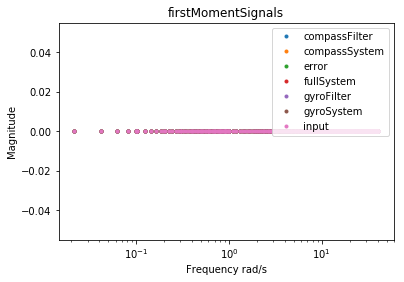

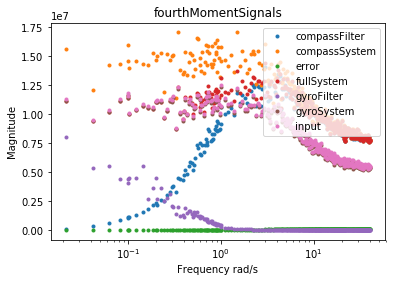

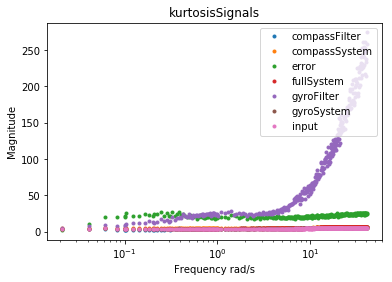

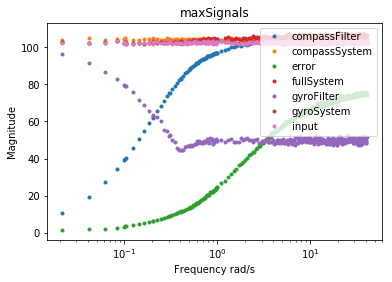

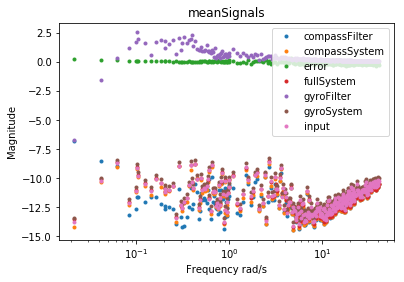

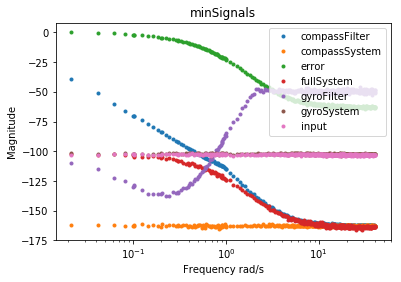

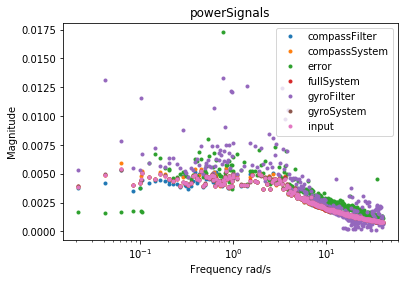

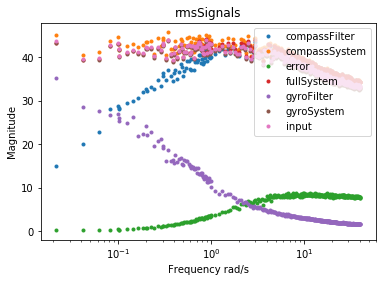

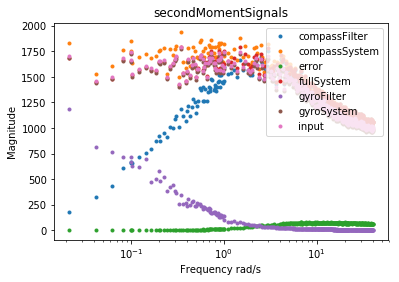

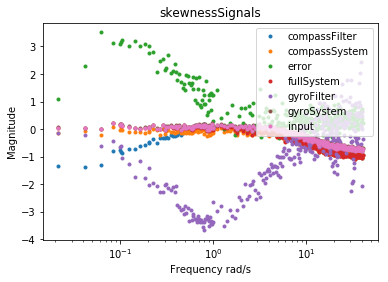

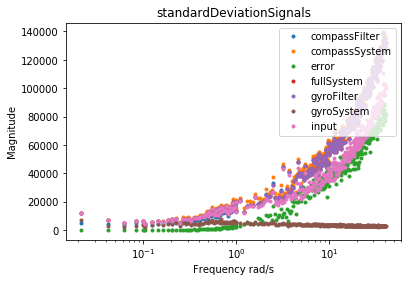

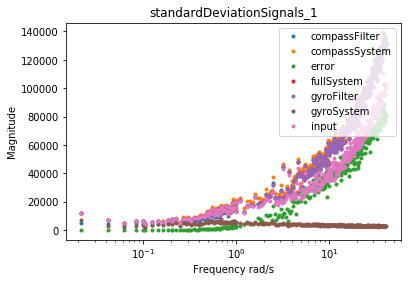

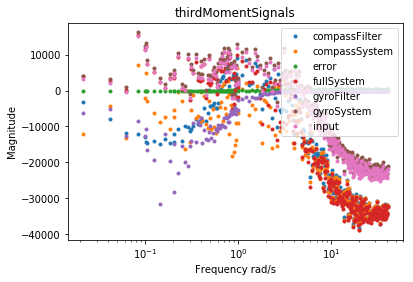

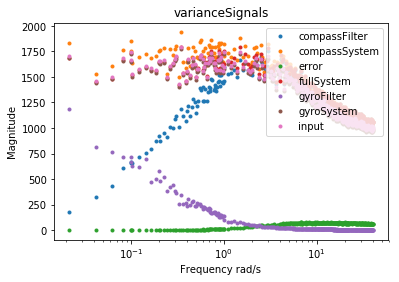

In [18]:
signal = "trueHeading"
i = 0
# Select all analytic metrics except cutoffFrequency
for analytic_metric in full_model_analytics_data.columns[full_model_analytics_data.columns != "cutoffFrequency"]:
    if analytic_metric.find("Correlation") == -1: # Not selecting rows that do not contain correlations
        for model_signal in full_model_analytics_data.index.levels[0]: # model signals signalsNamesOrdered list
            # Index per model signals signalsNamesOrdered for only for one input signalType
            model_signal_data = full_model_analytics_data.loc[pd.IndexSlice[model_signal, signal], :] # Surely there must be a more memory efficient way of doing this
            # Convert to numeric
            model_signal_data["cutoffFrequency"] = pd.to_numeric(model_signal_data.loc[:, "cutoffFrequency"])
            model_signal_data.sort_values(by="cutoffFrequency")

            plt.figure(i)
            plt.plot(model_signal_data.cutoffFrequency, model_signal_data[analytic_metric], '.',label=model_signal)
            plt.title(analytic_metric)
            plt.ylabel('Magnitude')
            plt.xlabel('Frequency rad/s')
            plt.xscale('log')
        i+=1
        plt.legend(loc="upper right")

## Analytics for all signals


So how will we determine the error from each signal accordingly? Let's assume it's propotional. We know the cutoff frequency determines how much of the compass dominates the response, and because its complementary, this also means how much of the gyro is not present in the response. So we want to know what is the error proportionality. We could in theory see the frequency response of the signals that we have, and compare as that changes. Do we have to create our own fast fourier transform response? Let's do it to see what happens.

How do we determine the error proportionality. We can consider a simple step signal case.

It would be inaccurate to linearly substract the value between the error and the 

We can model small UAV data of https://ieeexplore.ieee.org/abstract/document/6095129 and [A minimalist control strategy for small UAVs](https://ieeexplore.ieee.org/abstract/document/5354465), [Understanding Autonomous Drone Maneuverability
for Internet of Things Applications](https://research.csiro.au/ng/wp-content/uploads/sites/106/2016/08/Understanding-Autonomous-cameraready-2017.pdf). Here's the [Phantom 2 datasheet Max Angular Speed	150°/s](https://www.dji.com/uk/phantom-3-pro/info). [Mavic 2 pro Max Angular Velocity	200°/s](https://www.dji.com/uk/mavic-2/info#specs).

In [19]:
trueHeadingModel = full_model_analytics_data.loc[pd.IndexSlice[:, "trueHeading"], :]
trueHeadingModel["cutoffFrequency"] = pd.to_numeric(trueHeadingModel.loc[:, "cutoffFrequency"])
trueHeadingModel

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,,cutoffFrequency,firstMomentSignals,fourthMomentSignals,kurtosisCorrelationSignals,kurtosisSignals,maxCorrelationSignals,maxSignals,meanCorrelationSignals,meanSignals,minSignals,...,powerSignals,rmsCorrelationSignals,rmsSignals,secondMomentSignals,skewnessSignals,standardDeviationSignals,standardDeviationSignals_1,thirdMomentSignals,varCorrelationSignals,varianceSignals
signalsNamesOrdered,signalType,,,,,,,,,,,,,,,,,,,,,
compassSystem,trueHeading,0.021388,0,1.557729e+07,4.710829,4.629832,16359.104384,104.009725,-6050.993784,-14.224991,-162.096067,...,0.003841,13607.832492,45.128931,1834.270055,-0.152877,12189.330490,12189.330490,-12009.872793,1.485798e+08,1834.793534
compassFilter,trueHeading,0.021388,0,1.071090e+05,4.864257,3.367593,1413.758193,10.550538,-2903.251219,-6.825114,-39.195879,...,0.003779,5952.215695,14.997465,178.341782,-1.353900,5196.523528,5196.523528,-3224.528563,2.700386e+07,178.392679
fullSystem,trueHeading,0.021388,0,1.115249e+07,4.679243,3.914191,16418.045917,102.675318,-5758.358142,-13.537048,-102.385556,...,0.003899,13430.911544,43.257627,1687.970599,0.056869,12134.731367,12134.731367,3943.893210,1.472517e+08,1688.452325
gyroFilter,trueHeading,0.021388,0,8.040107e+06,4.679243,5.696860,16418.045917,96.574732,-5758.358142,-6.711934,-109.703436,...,0.005285,13430.911544,35.114685,1187.991025,-0.151186,12134.731367,12134.731367,-6190.575571,1.472517e+08,1188.330064
gyroSystem,trueHeading,0.021388,0,1.113934e+07,4.945246,3.940739,15509.914033,102.800724,-2855.106923,-13.420113,-101.714121,...,0.003908,7858.797433,43.143745,1681.283321,0.061119,7322.343289,7322.343289,4213.464185,5.361671e+07,1681.763139
input,trueHeading,0.021388,0,1.128704e+07,4.680781,3.876081,16449.322097,102.530091,-5708.616678,-13.779739,-102.953247,...,0.003891,13343.636392,43.546890,1706.450375,0.046624,12061.719806,12061.719806,3286.647599,1.454851e+08,1706.937376
error,trueHeading,0.021388,0,2.677914e-02,4.024528,2.876739,544.612487,1.404792,103.235590,0.242692,-0.040723,...,0.001653,178.158105,0.394185,0.096482,1.096165,145.209269,145.209269,0.032851,2.108573e+04,0.096510
compassSystem,trueHeading,0.041776,0,1.202913e+07,7.569183,5.177335,9210.129521,104.908212,-2886.087095,-10.377215,-162.330215,...,0.004934,7465.309706,40.397572,1524.277244,-0.073025,6885.359436,6885.359436,-4345.759382,4.740817e+07,1524.716138
compassFilter,trueHeading,0.041776,0,3.699523e+05,5.798223,3.475102,1290.926181,19.381347,-2383.526096,-8.570207,-51.215902,...,0.004215,5093.063538,19.993185,326.279001,-1.358372,4501.223841,4501.223841,-8005.756920,2.026102e+07,326.372949


In [20]:
errorTrueHeading = trueHeadingModel.loc[pd.IndexSlice["error", "trueHeading"], ["cutoffFrequency", "minSignals",\
                                                                                "maxSignals", "minCorrelationSignals", "maxCorrelationSignals"]]
errorTrueHeading.sort_values("cutoffFrequency", ascending=False)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:969: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


cutoffFrequency  minSignals  maxSignals  \
signalsNamesOrdered signalType                                             
error               trueHeading        40.636400  -63.009229   74.270454   
                    trueHeading        40.393900  -63.409435   75.027413   
                    trueHeading        40.151500  -62.842840   75.704922   
                    trueHeading        39.909100  -62.992717   74.599993   
                    trueHeading        39.666700  -62.858882   75.352907   
                    trueHeading        39.424200  -62.945176   75.300801   
                    trueHeading        39.181800  -63.071275   74.516247   
                    trueHeading        38.939400  -63.474854   74.896026   
                    trueHeading        38.697000  -62.923859   74.837716   
                    trueHeading        38.454500  -62.876453   75.134959   
                    trueHeading        38.212100  -62.605574   75.301959   
                    trueHeading        37.969700  -62.724562   74.660430   
                    trueHeading        37.727300  -63.132723   75.521677   
                    trueHeading        37.484800  -62.250134   75.490794   
                    trueHeading        37.242400  -62.806508   74.483652   
                    trueHeading        37.000000  -62.154065   74.994487   
                    trueHeading        36.757600  -63.154625   74.280729   
                    trueHeading        36.515200  -62.502143   74.508768   
                    trueHeading        36.272700  -63.350994   75.432220   
                    trueHeading        36.030300  -63.202376   74.988643   
                    trueHeading        35.787900  -62.713738   75.010578   
                    trueHeading        35.545500  -63.542226   75.611148   
                    trueHeading        35.303000  -62.503884   75.130608   
                    trueHeading        35.060600  -62.899762   74.268841   
                    trueHeading        34.818200  -63.154250   74.319368   
                    trueHeading        34.575800  -63.066998   74.611472   
                    trueHeading        34.333300  -63.052170   73.977128   
                    trueHeading        34.090900  -62.515473   74.196226   
                    trueHeading        33.848500  -62.981533   74.538315   
                    trueHeading        33.606100  -62.576521   74.265806   
...                                          ...         ...         ...   
                    trueHeading         0.501990  -11.541582   13.454016   
                    trueHeading         0.490310  -11.256776   13.341974   
                    trueHeading         0.469920  -10.982621   12.924600   
                    trueHeading         0.449530  -10.245658   12.440379   
                    trueHeading         0.429140   -9.906998   11.901948   
                    trueHeading         0.408760   -9.361040   11.506092   
                    trueHeading         0.401790   -9.253142   11.401031   
                    trueHeading         0.388370   -9.024891   11.101766   
                    trueHeading         0.367980   -8.287493   10.641114   
                    trueHeading         0.347590   -7.841262   10.039021   
                    trueHeading         0.327200   -7.345200    9.545606   
                    trueHeading         0.306820   -6.853174    9.275508   
                    trueHeading         0.301600   -6.767726    8.933972   
                    trueHeading         0.286430   -6.443434    8.677195   
                    trueHeading         0.266040   -5.901500    8.139303   
                    trueHeading         0.245650   -5.401666    7.584388   
                    trueHeading         0.225270   -4.890022    6.983225   
                    trueHeading         0.204880   -4.309296    6.433992   
                    trueHeading         0.201400   -4.403072    6.294371   
                    trueHeading         0.184490   -3.995018    5.865248   
     

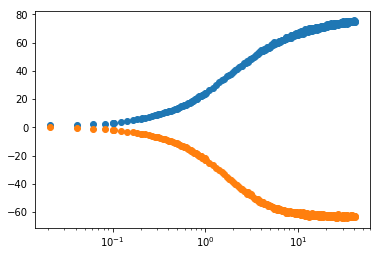

In [21]:
plt.plot(errorTrueHeading["cutoffFrequency"], errorTrueHeading["maxSignals"], 'o', \
         errorTrueHeading["cutoffFrequency"], errorTrueHeading["minSignals"], 'o')
plt.xscale('log')